In [1]:
import sys
sys.path.append('/home/g201381710/ExperimentsGH/DotlessArabic2/DotlessArabic')
sys.path.append('/home/g201381710/.local/lib/python3.10/site-packages')
sys.path.append('/home/g201381710/anaconda3/envs/dl4/lib/python3.10/site-packages')

sys.path

['/home/g201381710/ExperimentsGH/DotlessArabic2/DotlessArabic/dotless_arabic/analysis/notebooks',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/home/g201381710/.local/lib/python3.10/site-packages',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages/IPython/extensions',
 '/home/g201381710/.ipython',
 '/home/g201381710/ExperimentsGH/DotlessArabic2/DotlessArabic',
 '/home/g201381710/.local/lib/python3.10/site-packages',
 '/home/g201381710/anaconda3/envs/dl4/lib/python3.10/site-packages']

In [2]:
import re,random,math
from collections import Counter
from functools import lru_cache

from farasa.segmenter import FarasaSegmenter

import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from scipy.stats import linregress

from dotless_arabic.processing import process,undot

from dotless_arabic.tokenizers import DisjointLetterTokenizer,FarasaMorphologicalTokenizer, WordTokenizer

from dotless_arabic.datasets.news.collect import collect_dataset_for_analysis as collect_news_dataset_for_analysis
from dotless_arabic.datasets.quran.collect import collect_dataset_for_analysis as collect_quran_dataset_for_analysis
from dotless_arabic.datasets.poems.collect import collect_dataset_for_analysis as collect_poems_dataset_for_analysis
from dotless_arabic.datasets.wikipedia.collect import collect_dataset_for_analysis as collect_wikipedia_dataset_for_analysis
from dotless_arabic.datasets.aggregated.collect import collect_dataset_for_analysis as collect_aggregated_dataset_for_analysis
from dotless_arabic.datasets.sanadset_hadeeth.collect import collect_dataset_for_analysis as collect_sanadset_hadeeth_dataset_for_analysis

In [3]:
random.seed(42)

# functions

In [4]:
tokenizer = FarasaMorphologicalTokenizer()

[2023-03-01 08:31:55,773 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


In [5]:
@lru_cache()
def tokenize_dataset(dataset):
    tokenized_dataset = list()
    if isinstance(tokenizer,FarasaMorphologicalTokenizer):
        segmenter = FarasaSegmenter(interactive=True)
    for document in tqdm(dataset):
        if isinstance(tokenizer,FarasaMorphologicalTokenizer):
            tokenized_document = " ".join(
                tokenizer.split_text(
                    document,
                    segmenter=segmenter,
                )
            )
        else:
            tokenized_document = " ".join(tokenizer.split_text(document))
        tokenized_document = tokenized_document.replace("<##>", "")
        tokenized_document = re.sub("\s+", " ", tokenized_document)
        tokenized_dataset.append(tokenized_document)
    return tokenized_dataset

In [6]:
@lru_cache()
def words_counter(dataset,use_tqdm=True):
    if not use_tqdm:
        return Counter(word for item in dataset for word in item.split())    
    return Counter(word for item in tqdm(dataset) for word in item.split())

@lru_cache()
def undot_dataset(dataset):
    return list(map(undot, tqdm(dataset)))

@lru_cache()
def process_dataset(dataset):
    return list(map(process, tqdm(dataset)))

In [7]:
# tokenize datasets
all_datasets = [
    tokenize_dataset(dataset=tuple(collect_quran_dataset_for_analysis())),
    tokenize_dataset(dataset=tuple(collect_sanadset_hadeeth_dataset_for_analysis())),
    tokenize_dataset(dataset=tuple(collect_poems_dataset_for_analysis())),
    tokenize_dataset(dataset=tuple(collect_wikipedia_dataset_for_analysis())),
    tokenize_dataset(dataset=tuple(collect_news_dataset_for_analysis())),
#     tokenize_dataset(dataset=tuple(collect_raw_aggregated_dataset())),
]

aggregated_dataset = []
for _dataset in all_datasets:
    aggregated_dataset.extend(_dataset)
all_datasets.append(aggregated_dataset)

[2023-03-01 08:31:57,574 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


  0%|          | 0/6236 [00:00<?, ?it/s]

####################################################################################################
Original Number of Samples:
650,986
####################################################################################################


[2023-03-01 08:32:19,033 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


####################################################################################################
Number of Samples after dropping duplicates:
637,565
####################################################################################################


  0%|          | 0/637565 [00:00<?, ?it/s]

Using custom data configuration MagedSaeed--ashaar-719bb58a76ea0092
Found cached dataset parquet (/home/g201381710/.cache/huggingface/datasets/arbml___parquet/MagedSaeed--ashaar-719bb58a76ea0092/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
[2023-03-01 08:49:05,977 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


  0%|          | 0/7714858 [00:00<?, ?it/s]

[2023-03-01 09:22:52,991 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


  0%|          | 0/4636663 [00:00<?, ?it/s]

[2023-03-01 11:27:33,840 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


  0%|          | 0/2784041 [00:00<?, ?it/s]

In [8]:
# process datasets
all_datasets = [
    process_dataset(dataset=tuple(all_datasets[0])),
    process_dataset(dataset=tuple(all_datasets[1])),
    process_dataset(dataset=tuple(all_datasets[2])),
    process_dataset(dataset=tuple(all_datasets[3])),
    process_dataset(dataset=tuple(all_datasets[4])),
#     process_dataset(dataset=tuple(datasets[5])),
]

aggregated_dataset = []
for _dataset in all_datasets:
    aggregated_dataset.extend(_dataset)  
all_datasets.append(aggregated_dataset)

  0%|          | 0/6236 [00:00<?, ?it/s]

  0%|          | 0/637565 [00:00<?, ?it/s]

  0%|          | 0/7714858 [00:00<?, ?it/s]

  0%|          | 0/4636663 [00:00<?, ?it/s]

  0%|          | 0/2784041 [00:00<?, ?it/s]

In [9]:
for dataset in tqdm(all_datasets):
    random.shuffle(dataset)

  0%|          | 0/6 [00:00<?, ?it/s]

In [10]:
all_datasets_names = [
    'quran',
    'sanadset hadeeth',
    'poems',
    'wikipedia',
    'news',
    'aggregated',
]

In [11]:
# we may need to report the error on the regression line: MSE, MAE, etc.
def get_heaps_law_constants(dataset,get_points_list=False,clear_lru_cache=False):
  X,Y = [],[]
  vocabulary = set()
  number_of_tokens = 0
  for index in tqdm(range(len(dataset))):
    
    counter = words_counter(
        tuple([dataset[index]]),
        use_tqdm=False,
    )
    
    number_of_tokens += sum(counter.values())
    X.append(
        math.log(
            number_of_tokens,
             math.e, #base
          ),
      )
    
    vocabulary.update(counter.keys())
    Y.append(
        math.log(
            len(vocabulary),
             math.e, #base
          ),
      )
    
    if clear_lru_cache:
      words_counter.cache_clear()
    
  slope,intercept,*_= linregress(X,Y)

  b = slope
  k = math.e**intercept

  if get_points_list:
    return b,k,(X,Y)
  return b,k

In [12]:
get_heaps_law_constants(dataset=all_datasets[0])

  0%|          | 0/6236 [00:00<?, ?it/s]

(0.5981503074018123, 6.783321604552981)

In [13]:
def plot_heaps(
    datasets=all_datasets,
    datasets_names=all_datasets_names,
    figsize=(25,15),
  ):

  unlog = lambda points: list(map(lambda point: math.e**point,points))

  plt.figure(figsize=figsize)
    
  for dataset,dataset_name in zip(datasets,datasets_names):
        
      beta,k,(X,Y) = get_heaps_law_constants(dataset,get_points_list=True)
      print()
      print('-'*100)
      print('-'*100)
      print('beta: ',beta,' k ',k,' for dataset: ',dataset_name)

      print('some samples of the dotted X,Y lists:')  
      print(list(map(lambda item: round(item,2),unlog(X[:10]))))
      print(list(map(lambda item: round(item,2),unlog(Y[:10]))))
        
      if 'aggregated' in dataset_name:
        undotted_dataset = []
        for dataset in all_datasets[:-1]:
            undotted_dataset.extend(undot_dataset(dataset=tuple(dataset)))
        random.shuffle(undotted_dataset)
      else:
        undotted_dataset = undot_dataset(dataset=tuple(dataset))
        
      undotted_beta,undotted_k,(undotted_X,undotted_Y) = get_heaps_law_constants(undotted_dataset,get_points_list=True)
      print('-'*100)
      print('undotted beta: ',undotted_beta,' undotted k ',undotted_k, ' for dataset: ',dataset_name)
      print('-'*100)
      print('-'*100)
      print()
       
      plt.plot(unlog(X),unlog(Y),label=f'{dataset_name} dataset (k={k:.3f},β={beta:.3f})')
      plt.plot(
          unlog(X),
          [k*x**beta for x in unlog(X)],
          label=f'dotted regression fit for {dataset_name}',
          linestyle='dashed',
      )
      # https://stackoverflow.com/a/41308516/4412324
      # plt.text(
      #     x=0.73,
      #     y=0.95,
      #     s=f'dotted: k={k:.3f},β={beta:.3f}',
      #     transform=plt.gca().transAxes,
      #     fontsize=12,
      # )
    
      plt.plot(unlog(undotted_X),unlog(undotted_Y),label=f'undotted {dataset_name} dataset (k={undotted_k:.3f},β={undotted_beta:.3f})')
      plt.plot(
          unlog(undotted_X),
          [undotted_k*x**undotted_beta for x in unlog(undotted_X)],
          label=f'undotted regression fit for {dataset_name}',
          linestyle='dashed',
      )
        
      # plt.text(
      #     x=0.73,
      #     y=0.92,
      #     s=f'undotted: k={undotted_k:.3f},β={undotted_beta:.3f}',
      #     transform=plt.gca().transAxes,
      #     fontsize=12,
      # )
    
      plt.legend(loc='lower right',fontsize=14)
      plt.ylim(ymin=0)
      plt.xlim(xmin=0)
      # https://stackoverflow.com/questions/6390393/matplotlib-make-tick-labels-font-size-smaller
      plt.xticks(fontsize=14)
      plt.yticks(fontsize=14)
      # https://stackoverflow.com/questions/34227595/how-to-change-font-size-of-the-scientific-notation-in-matplotlib
      # https://stackoverflow.com/questions/21512305/inconsistent-font-size-for-scientific-notation-in-axis
      plt.rc('font',size=12)

  0%|          | 0/6236 [00:00<?, ?it/s]


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
beta:  0.5981503074018123  k  6.783321604552981  for dataset:  quran
some samples of the dotted X,Y lists:
[7.0, 15.0, 72.0, 94.0, 115.0, 121.0, 124.0, 129.0, 169.0, 228.0]
[7.0, 13.0, 48.0, 58.0, 65.0, 68.0, 70.0, 74.0, 91.0, 107.0]


  0%|          | 0/6236 [00:00<?, ?it/s]

  0%|          | 0/6236 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
undotted beta:  0.5769589106983928  undotted k  7.716709348790397  for dataset:  quran
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------



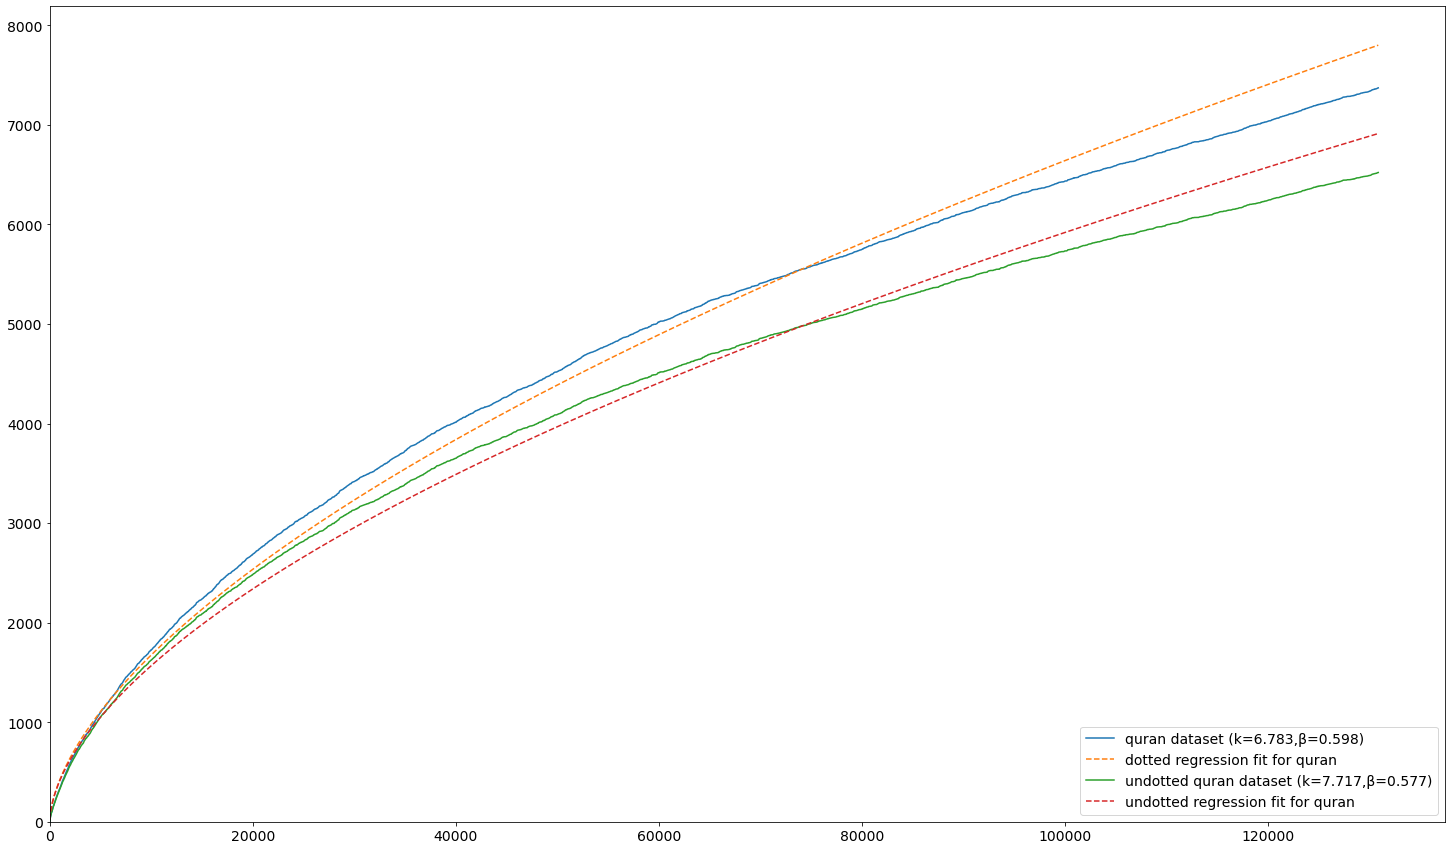

In [14]:
plot_heaps(
    datasets=[all_datasets[0]],
    datasets_names=[all_datasets_names[0]],
)

  0%|          | 0/15779363 [00:00<?, ?it/s]


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
beta:  0.5697569533869408  k  12.763095742988044  for dataset:  aggregated
some samples of the dotted X,Y lists:
[99.0, 111.0, 195.0, 203.0, 328.0, 436.0, 625.0, 634.0, 664.0, 674.0]
[53.0, 60.0, 103.0, 108.0, 158.0, 189.0, 252.0, 256.0, 268.0, 271.0]


  0%|          | 0/637565 [00:00<?, ?it/s]

  0%|          | 0/7714858 [00:00<?, ?it/s]

  0%|          | 0/4636663 [00:00<?, ?it/s]

  0%|          | 0/2784041 [00:00<?, ?it/s]

  0%|          | 0/15779363 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
undotted beta:  0.5672955271021378  undotted k  10.982037695119622  for dataset:  aggregated
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------



  0%|          | 0/2784041 [00:00<?, ?it/s]


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
beta:  0.49011457439619  k  25.59552047930942  for dataset:  news
some samples of the dotted X,Y lists:
[19.0, 31.0, 78.0, 191.0, 461.0, 655.0, 742.0, 852.0, 974.0, 1015.0]
[16.0, 24.0, 56.0, 108.0, 214.0, 279.0, 306.0, 333.0, 382.0, 394.0]


  0%|          | 0/2784041 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
undotted beta:  0.4892446845768729  undotted k  21.731103835602564  for dataset:  news
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------



  0%|          | 0/4636663 [00:00<?, ?it/s]


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
beta:  0.5839860436999618  k  10.35602989203107  for dataset:  wikipedia
some samples of the dotted X,Y lists:
[60.0, 81.0, 172.0, 208.0, 218.0, 275.0, 366.0, 371.0, 489.0, 542.0]
[33.0, 44.0, 84.0, 98.0, 102.0, 127.0, 161.0, 163.0, 196.0, 217.0]


  0%|          | 0/4636663 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
undotted beta:  0.5806932227556146  undotted k  9.358795225780106  for dataset:  wikipedia
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------



  0%|          | 0/7714858 [00:00<?, ?it/s]


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
beta:  0.5044461618376481  k  43.44428829970482  for dataset:  poems
some samples of the dotted X,Y lists:
[9.0, 18.0, 25.0, 33.0, 42.0, 51.0, 59.0, 65.0, 72.0, 81.0]
[8.0, 16.0, 22.0, 30.0, 34.0, 39.0, 43.0, 48.0, 52.0, 57.0]


  0%|          | 0/7714858 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
undotted beta:  0.4978045844651452  undotted k  36.433121792087846  for dataset:  poems
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------



  0%|          | 0/637565 [00:00<?, ?it/s]


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
beta:  0.40423687242438133  k  83.81555561739192  for dataset:  sanadset hadeeth
some samples of the dotted X,Y lists:
[37.0, 92.0, 139.0, 178.0, 249.0, 280.0, 318.0, 434.0, 484.0, 493.0]
[26.0, 53.0, 77.0, 91.0, 110.0, 120.0, 131.0, 159.0, 172.0, 175.0]


  0%|          | 0/637565 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
undotted beta:  0.3953162054060055  undotted k  77.70943602082251  for dataset:  sanadset hadeeth
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------



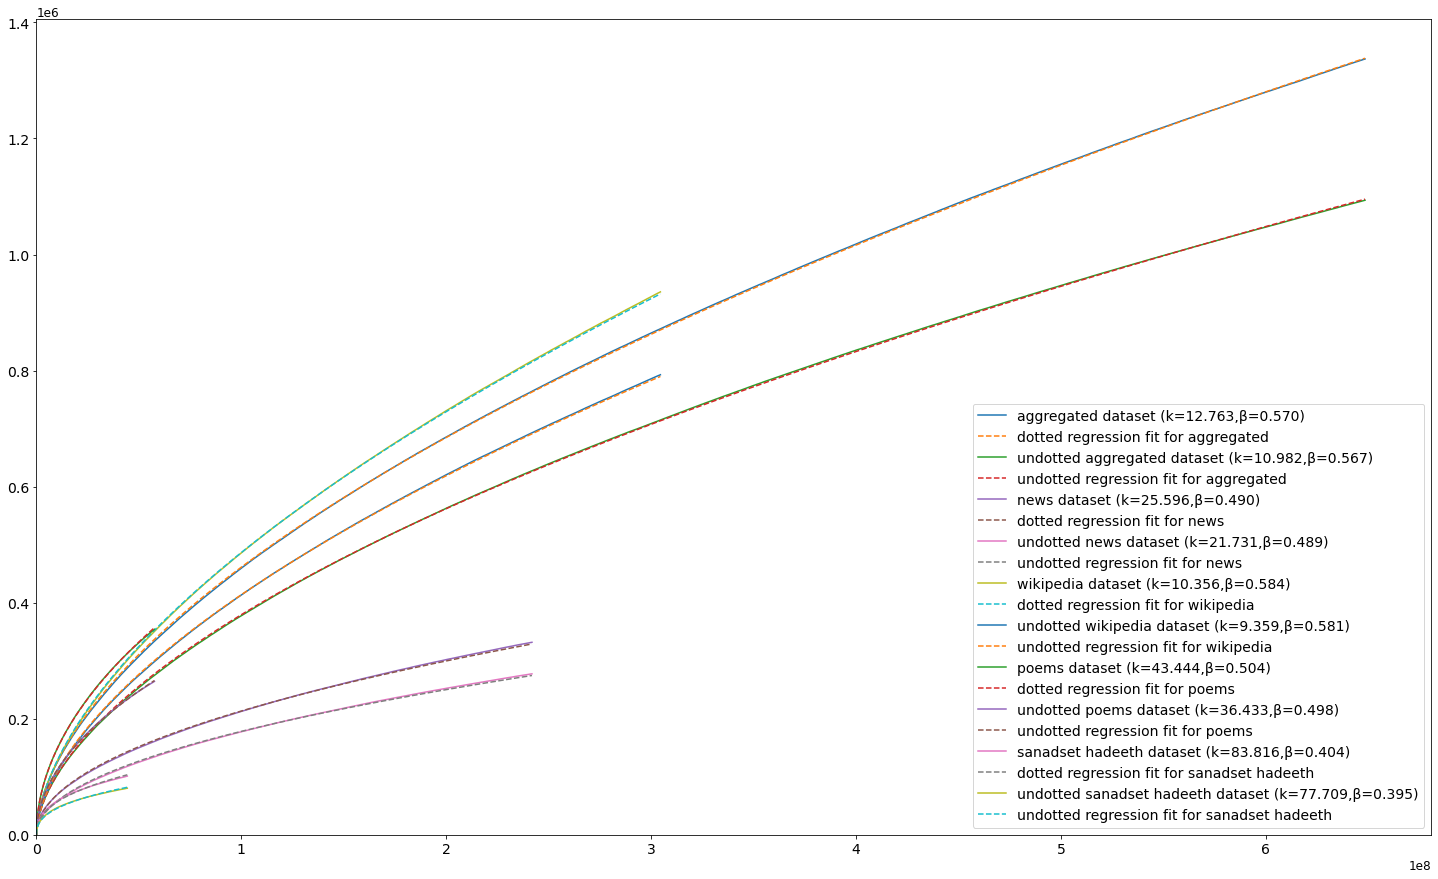

In [15]:
plot_heaps(
    datasets=all_datasets[:0:-1],
    datasets_names=all_datasets_names[:0:-1],
)